In [1]:
#Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
# URL of the dataset
data_url = "http://lib.stat.cmu.edu/datasets/boston"
# Load the dataset
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
# The dataset is structured in an unusual format, so we need to reassemble it
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])  # Feature matrix
target = raw_df.values[1::2, 2]  # Target values (house prices)
# Column names based on the original dataset description
column_names = [
    "CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", 
    "PTRATIO", "B", "LSTAT"
]
# Create a DataFrame
data = pd.DataFrame(data, columns=column_names)
data["PRICE"] = target
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [3]:
# Check for missing values
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [4]:
# Check for duplicated values
data.duplicated().sum()

0

In [5]:
# Finding out the correlation between the features
corr = data.corr()
corr.shape

(14, 14)

<Axes: >

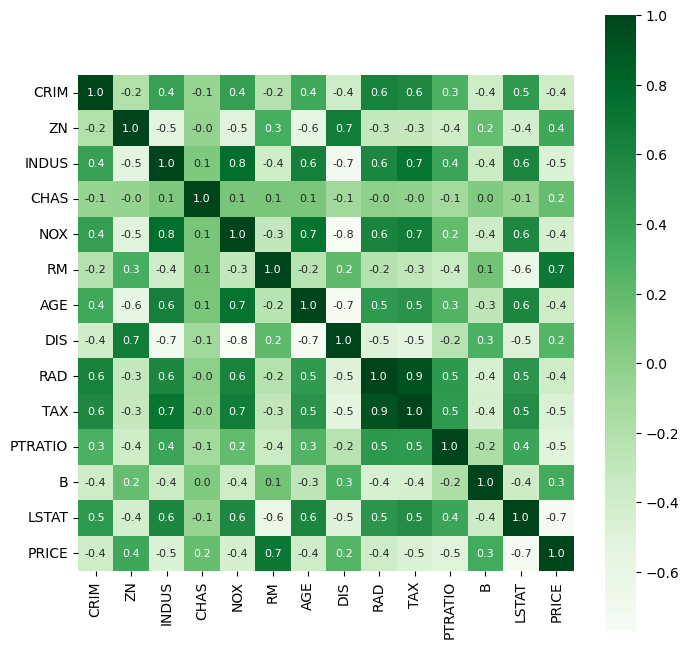

In [6]:
# Plotting the heatmap of correlation between features
plt.figure(figsize=(8,8))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Greens')

In [7]:
# Separate features (X) and target (y)
X = data.drop(columns=['PRICE'])
y = data['PRICE']

In [8]:
# Split into training and test sets (75-25 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [9]:
#importing DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
clf=DecisionTreeRegressor(random_state=42,criterion='poisson',max_depth=5)
model=clf.fit(X_train,y_train)

In [10]:
#Predicting the values for target column
y_pred=model.predict(X_test)
y_pred

array([23.32222222, 30.05      , 18.75172414, 23.32222222, 16.70952381,
       21.1       , 18.75172414, 14.37333333, 21.1       , 21.1       ,
       18.75172414, 26.5       ,  8.35      , 21.1       , 21.1       ,
       21.1       , 18.75172414,  8.35      , 43.26923077, 16.70952381,
       23.32222222, 23.32222222, 14.37333333, 26.49166667, 13.975     ,
       16.70952381, 19.98      , 16.70952381, 18.75172414, 21.1       ,
       18.75172414, 23.32222222, 31.        , 21.1       , 13.37      ,
       13.975     , 33.2875    , 19.98      , 18.75172414, 23.32222222,
       14.37333333, 26.49166667, 43.26923077, 21.1       , 23.32222222,
       13.975     , 16.70952381, 23.32222222, 16.70952381, 30.05      ,
       21.1       , 33.2875    , 16.70952381, 26.49166667, 48.79090909,
       21.1       , 13.975     , 30.05      , 23.32222222, 18.75172414,
       26.49166667, 33.2875    , 30.05      , 21.1       , 30.05      ,
       21.56666667, 13.975     , 23.32222222, 30.05      , 16.70

In [11]:
# Evaluate performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print results
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared Score (R²): {r2}")

Mean Absolute Error (MAE): 2.576997413995785
Mean Squared Error (MSE): 13.93751446664732
Root Mean Squared Error (RMSE): 3.7332980682832333
R-squared Score (R²): 0.8009698277077446


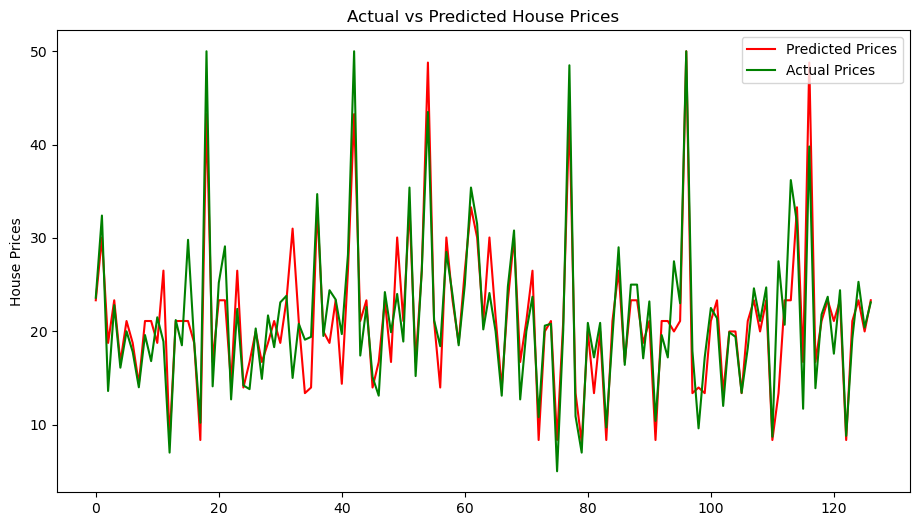

In [12]:
#Draw Predicted v/s Actual house price plot
ind=[i for i in range(len(y_test))]
plt.figure(figsize=(11,6))
plt.plot(ind, y_pred, color='red', label="Predicted Prices")
plt.plot(ind,y_test, color='green',label='Actual Prices')
plt.ylabel("House Prices")
plt.title("Actual vs Predicted House Prices")
plt.legend()
plt.show()

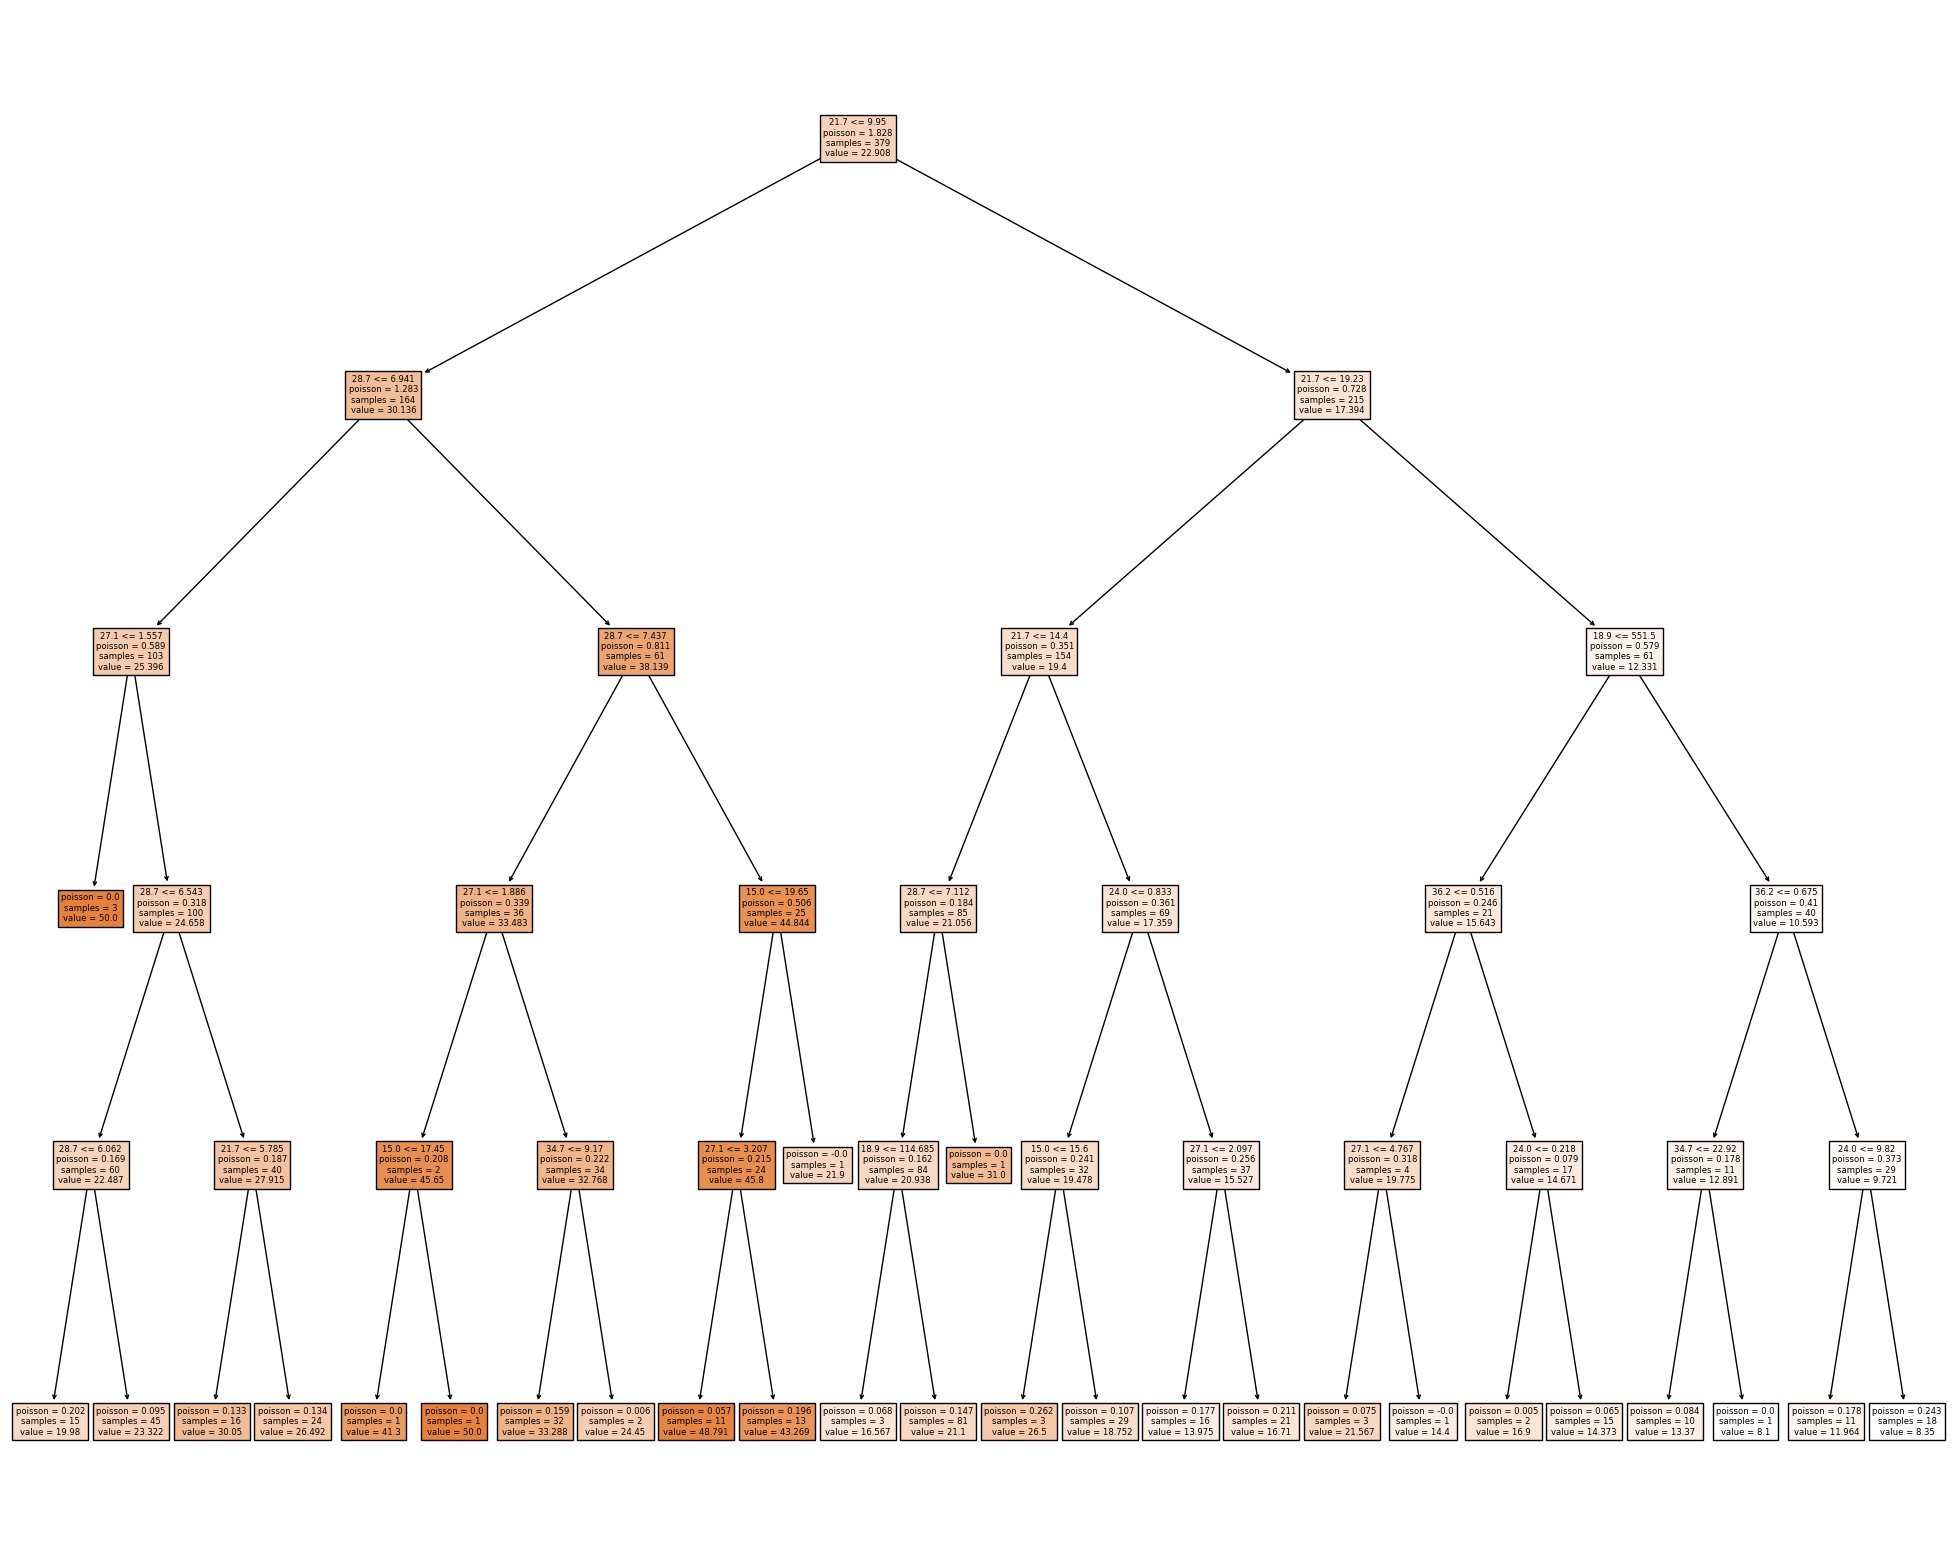

In [13]:
#To print decision Tree
from sklearn import tree
fig=plt.figure(figsize=(25,20))
dt=tree.plot_tree(clf,feature_names=data['PRICE'],filled=True)

SVM Regression

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split

In [15]:
# Define different SVM models with various kernels
svm_linear = SVR(kernel='linear', C=1.0)
svm_poly = SVR(kernel='poly', degree=3, C=1.0)
svm_rbf = SVR(kernel='rbf', C=1.0, gamma='scale')

# Train models
svm_linear.fit(X_train, y_train)
svm_poly.fit(X_train, y_train)
svm_rbf.fit(X_train, y_train)

# Predict on test data
y_pred_linear = svm_linear.predict(X_test)
y_pred_poly = svm_poly.predict(X_test)
y_pred_rbf = svm_rbf.predict(X_test)

In [16]:
# Define a function to evaluate and print metrics
def evaluate_model(name, y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    print(f"--- {name} ---")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"R-squared Score (R²): {r2:.4f}")
    print()

# Evaluate and print results for each model
evaluate_model("SVR Linear Kernel", y_test, y_pred_linear)
evaluate_model("SVR Polynomial Kernel", y_test, y_pred_poly)
evaluate_model("SVR RBF Kernel", y_test, y_pred_rbf)

--- SVR Linear Kernel ---
Mean Absolute Error (MAE): 3.1454
Mean Squared Error (MSE): 27.8667
Root Mean Squared Error (RMSE): 5.2789
R-squared Score (R²): 0.6021

--- SVR Polynomial Kernel ---
Mean Absolute Error (MAE): 4.4503
Mean Squared Error (MSE): 50.4746
Root Mean Squared Error (RMSE): 7.1045
R-squared Score (R²): 0.2792

--- SVR RBF Kernel ---
Mean Absolute Error (MAE): 4.4625
Mean Squared Error (MSE): 49.2842
Root Mean Squared Error (RMSE): 7.0203
R-squared Score (R²): 0.2962



SVM Regression(Synthetic data)

In [17]:
# Generate synthetic linearly separable data
X, y = make_regression(n_samples=50, n_features=2, n_targets=1, n_informative=2, random_state=42)

In [18]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [19]:
# Create SVM model with linear kernel
svm_model = SVR(kernel='linear', C=1.0)  # C is the regularization parameter

In [20]:
# Train the model
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)
y_pred

array([ 13.28490831,  27.72095675,  -0.12990567, -47.5761279 ,
         5.75298764,  15.11751445,   9.27257524, -11.26457071,
       -47.78171627, -27.4758138 , -23.1168608 , -31.72958863,
        14.86779976])

In [21]:
y_pred2=svm_model.predict(X_train)
r2_over = r2_score(y_train, y_pred2)
print(r2_over)

0.7564854196320014


In [22]:
# Evaluate performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print results
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared Score (R²): {r2}")

Mean Absolute Error (MAE): 18.28337709067023
Mean Squared Error (MSE): 440.0314094584985
Root Mean Squared Error (RMSE): 20.97692564363278
R-squared Score (R²): 0.7645025999402753


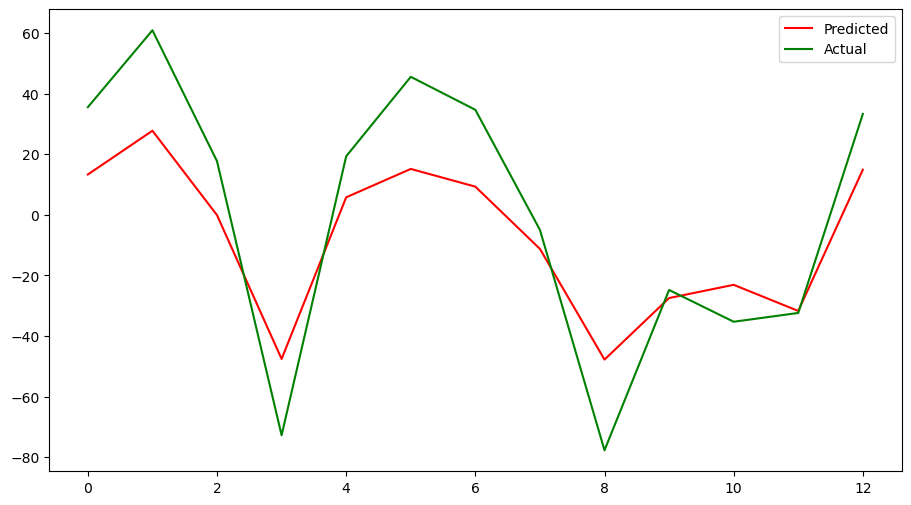

In [23]:
#Draw Predicted v/s Actual plot
ind=[i for i in range(len(y_test))]
plt.figure(figsize=(11,6))
plt.plot(ind, y_pred, color='red', label="Predicted")
plt.plot(ind,y_test, color='green',label='Actual')
plt.legend()
plt.show()